In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
no_of_folds=5

In [0]:
data=pd.read_csv("Housing.csv")
#data=data-data.mean()
index = [i for i in range(data.shape[0])]
np.random.shuffle(index)
data=data.set_index([index]).sort_index()

In [0]:
Y=data["PRICE"]
X=data[data.columns.difference(['PRICE'])]


In [0]:
X=(X-X.mean())

In [0]:
def splitData(itr):
  X_shuffled={};
  Y_shuffled={};
  size=int(len(data)/itr);
  start=0;
  for iterating_var in range(0,itr):
    X_shuffled[iterating_var+1]=X[start:size*(iterating_var+1)];
    Y_shuffled[iterating_var+1]=Y[start:size*(iterating_var+1)];
    start=size*(iterating_var+1);
  return X_shuffled,Y_shuffled;


In [0]:
def getnexttrainvalid(X_shuffled, Y_shuffled, itr):
  X_train=pd.DataFrame();
  Y_train=pd.DataFrame(); 
  X_valid=pd.DataFrame();
  Y_valid=pd.DataFrame();
  for iterating_var in range(0,no_of_folds):
    if iterating_var!=itr:
      X_train=X_train.append(X_shuffled.get(iterating_var+1));
      #Y_train=Y_train.append((Y_shuffled.get(iterating_var+1))["PRICE"]);
      Y_train=pd.concat([Y_train, Y_shuffled.get(iterating_var+1)]);
    else:
      X_valid=X_shuffled.get(iterating_var+1);
      Y_valid=pd.concat([Y_valid, Y_shuffled.get(iterating_var+1)])
  return X_train,Y_train,X_valid,Y_valid;

In [0]:
def train(X_train, Y_train,lambda_val):
  inv=np.linalg.inv(np.dot(X_train.transpose(), X_train)+np.matrix(np.identity(13), copy=False)*lambda_val);
  weights_with_intercep=np.dot(np.dot(inv,X_train.transpose()),Y_train);
  model_weights=weights_with_intercep[:13];
  model_intercept=Y_train.mean();
  return model_weights,model_intercept;

In [0]:
def predict(Xvalid, model_weights, model_intercept):
  #Xvalid=(Xvalid-Xvalid.mean())/Xvalid.std()
  return np.dot(Xvalid,(model_weights))+model_intercept[0];

In [0]:
def model(lambda_val):
  X_shuffled,Y_shuffled=splitData(no_of_folds);
  rmse_train=0;
  rmse_test=0;
  for itr in range(0,no_of_folds):
    X_train,Y_train,X_valid,Y_valid=getnexttrainvalid(X_shuffled,Y_shuffled,itr);
    model_weights,model_intercept=train(X_train, Y_train,lambda_val);
    res=predict(X_valid,model_weights,model_intercept);
    res_train=predict(X_train,model_weights,model_intercept);
    rmse_test+=rmse(pd.DataFrame(res.flatten().transpose()).values,Y_valid.values);
    rmse_train+=rmse(pd.DataFrame(res_train.flatten().transpose()).values,Y_train.values);
  rmse_test=rmse_test/no_of_folds;
  rmse_train=rmse_train/no_of_folds;
  return rmse_test,rmse_train;

In [0]:
Y.mean()

22.553861386138625

In [0]:
def rmse(predictions, targets):
    diff = predictions - targets  
    diff_sqr = diff**2                  
    mean_of_diff_sqr = diff_sqr.mean()  
    rmse_val = np.sqrt(mean_of_diff_sqr)           
    return rmse_val                                

In [0]:
rmse_train=[];
rmse_test=[];
for lambda_value in range(1,101):
  rmse_test_val,rmse_train_val=model(lambda_value);
  rmse_train.append(rmse_train_val);
  rmse_test.append(rmse_test_val);


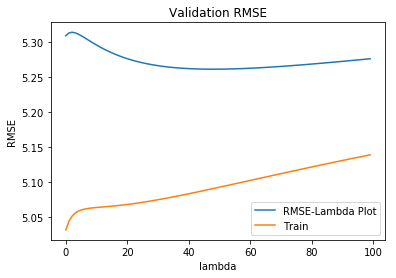

In [0]:
plt.plot(rmse_test,label="RMSE-Lambda Plot")
plt.plot(rmse_train,label="Train")
plt.title("Validation RMSE")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.legend()

In [0]:
#plt.plot(rmse_train)
#plt.title("Train RMSE")
#plt.xlabel("lambda")
#plt.ylabel("RMSE")

*Question no 1 b)*
in order to make the model more general i am shuffling the data.
Since the Data is not centralized, the loss function can be defined as follow :
*\begin{align}*
\sum_{i=1}^{n} [(y_i-w_0-\sum_{j=1}^{p}[X_{ij}w_j])^{2}]
\end{align}
Once the Data is  centralized, the loss function can be defined as 
\begin{align}
\sum_{i=1}^{n} [(y_i-\sum_{j=1}^{p}[X_{ij}w_j])^{2}]
\end{align}
so i centralized the data and calculated the weight matrix(w) for each set of Kfold Cross validation and calculated the RMSE error for training and cross validation data 

Question no 1c)
As we can see in the plot with the increase of $\lambda$ the coefficients will decrease and based on the graph if we start increasing the $\lambda$ the Training Error will increase and the test Error will decrease(removing overfitting) but after a certain $\lambda$ both the training and the test error are increasing so it starts underfitting.But the plot also depends on the shuffling of the dataset as well if all the  class data are unevenly distributed the training error and the test error might increase as well .   